In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv("../csv/fcc-forum-pageviews.csv", parse_dates=True) 
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


After reading the df, make sure that the **date** column is read as datetime format, so that you can extract and manipulate dates as you wish.

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df["date"]

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

Use **set_index** to replace the index of the dataframe with an existing column ("date" in this case). The option **inplace=True** makes the df to be overwritten by the new df created by set_index. If you don't give this option, you need to store the dataframe resulting from set_index explicitly into another variable.

In [5]:
df.set_index("date", inplace=True)

In [6]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Let's filter out

In [7]:
df = df[(df["value"]>=df["value"].quantile(0.025)) & (df["value"]<=df["value"].quantile(0.975))]


In [8]:
def draw_line_plot(x_axis_data, y_axis_data):
    fig, ax = plt.subplots(figsize=(40,10))
    ax.plot(x_axis_data,y_axis_data, "r")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    

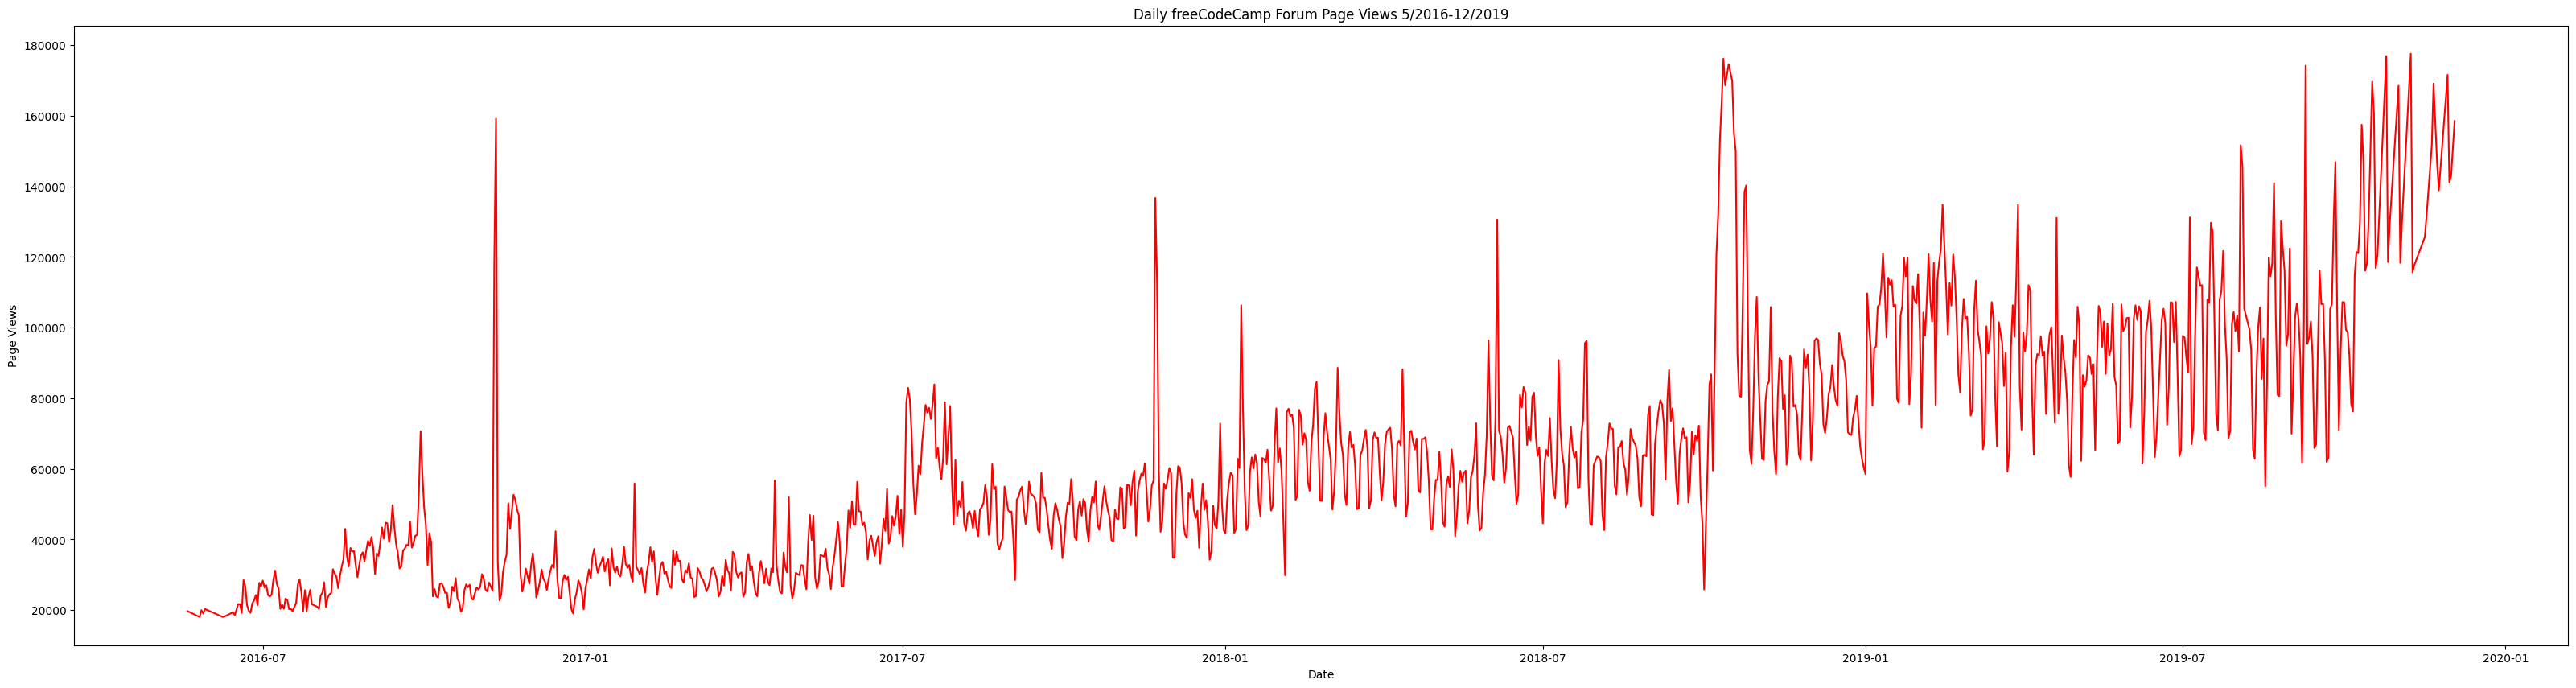

In [9]:
draw_line_plot(df.index, df["value"])

In [10]:
df.reset_index(inplace=True)

After re-setting the index (because you want to use the column "date"), we can create custom new columns which strip the month, the year, or the month names from the corresponding date.

In [11]:
df.loc[:,"year"] = df.loc[:,"date"].dt.year
df.loc[:,"month"] = df.loc[:,"date"].dt.month
df.loc[:,"month_name"] = df.loc[:,"date"].dt.strftime("%B")

C:\Users\matte\AppData\Local\Temp\ipykernel_10564\2906492628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"year"] = df.loc[:,"date"].dt.year
C:\Users\matte\AppData\Local\Temp\ipykernel_10564\2906492628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"month"] = df.loc[:,"date"].dt.month
C:\Users\matte\AppData\Local\Temp\ipykernel_10564\2906492628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [12]:
df = df.set_index("date")

In [13]:
df.head()

,value,year,month,month_name
date,,,,
2016-05-19,19736,2016,5,May
2016-05-26,18060,2016,5,May
2016-05-27,19997,2016,5,May
2016-05-28,19044,2016,5,May
2016-05-29,20325,2016,5,May


In [14]:
df.iloc[0]["month_name"]

'May'

In [15]:
df = df.drop(columns="month_name")

***
# Groupby, Unstack, and Pivoting Dataframes
#### Other sophisticated and juicy stuff. Consider that the goal is to plot a grouped bar graph, which has Years on the x-axis and Average Page Views on the y-axis. However, we want a more granular information: not only the average page views for entire years, but each year should be splitted into the average page views per each month. 

##### In order to do so, we need to re-format our dataframe so that we can have a hierarchical index: first by years, and then dividing each year by the months it comprises. 
##### The **groupby** method allows to group the dataframe according to one or more columns, which will become the index(es) in the new dataframe. The order in which you give the **by=** option determined the hierarchy of the new df. Once you have grouped values, you need to specify what kind of aggregation measure you want to use to compute "values" for each new group: in this case, we want the mean().

##### Finally, we want to pivot the dataframe so that the months become columns of the new df, corresponding to their years. We can do this using the **unstack()** method.

In [16]:
years = df.groupby(by=["year","month"])["value"].mean().unstack()

The next few lines of code are just a mock-up example to practice with the logic behind groupby and unstack, with a much smaller df.

In [17]:
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-03'],
    'Fruit': ['Apple', 'Banana', 'Apple', 'Banana', 'Apple', 'Banana'],
    'Color': ['Red', 'Yellow', 'Green', 'Yellow', 'Red', 'Green'],
    'Sales': [3, 7, 5, 2, 4, 6]
}

fake_df = pd.DataFrame(data)

In [18]:
fake_df = fake_df.groupby(by=["Fruit","Color"])["Sales"].sum()
fake_df

Fruit   Color 
Apple   Green     5
        Red       7
Banana  Green     6
        Yellow    9
Name: Sales, dtype: int64

In [19]:
unstacked = fake_df.unstack()

In [20]:
unstacked.columns

Index(['Green', 'Red', 'Yellow'], dtype='object', name='Color')

In [21]:
unstacked

Color,Green,Red,Yellow
Fruit,,,
Apple,5.0,7.0,NaN
Banana,6.0,NaN,9.0


In [22]:
x_positions = np.arange(len(unstacked.index))
x_number_bars = len(unstacked.columns)
bar_width=0.05

In [23]:
x_positions

array([0, 1])

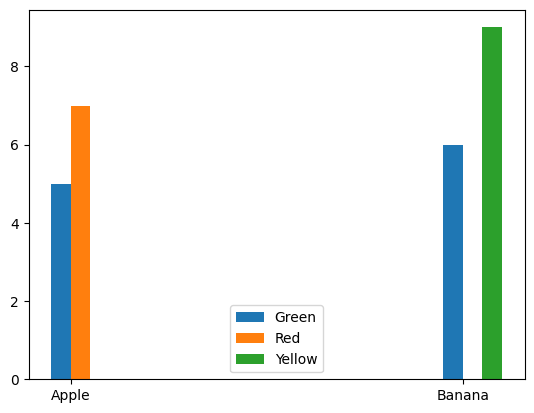

In [24]:
fig, ax = plt.subplots()
for i, (color,sales) in enumerate(unstacked.items()):
    ax.bar(x_positions+i*bar_width,sales,bar_width,label=color)

ax.set_xticks(x_positions+bar_width/2)
ax.set_xticklabels(unstacked.index)
ax.legend()

From here, we come back to the df we are interested in, and we prepare for the grouped bar chart. We set the x_positions as a NumPy array that has the length of Years, because the years are what we want on the x_axis. Instead, the number of bars we will have per each year will be the number of months, i.e. the columns in the new unstacked df.

In [25]:
years

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


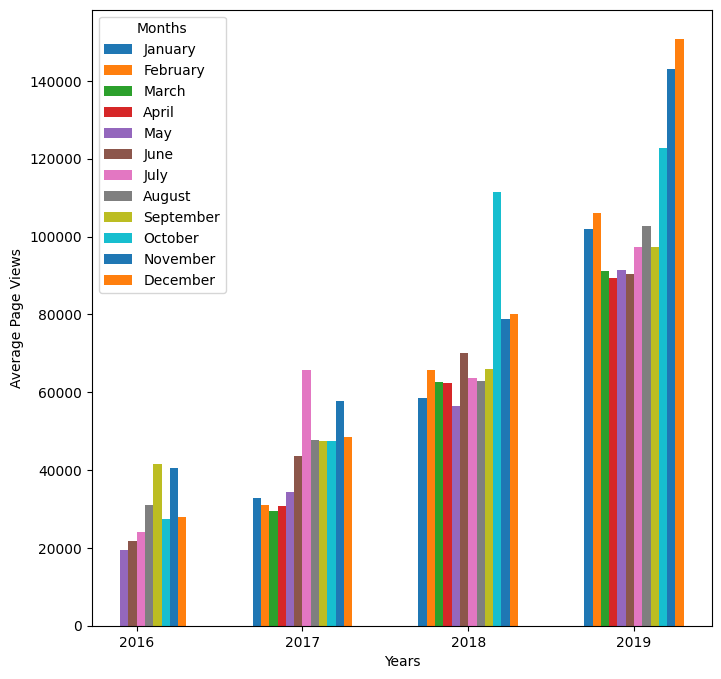

In [26]:
x_axis = np.arange(len(years.index))
x_number_of_bars = len(years.columns)
bar_width = 0.05
month_names = ["January","February","March","April","May","June","July","August","September","October","November","December"]

i_test = []
month_test = []
values_test = []
fig, ax = plt.subplots(figsize=(8,8))
for i, (month,values) in enumerate(years.items()):
    ax.bar(x_axis+i*bar_width, values, bar_width, label=month_names[i])
    i_test.append(i)
    month_test.append(month)
    values_test.append(values)


ax.legend(title="Months",loc="upper left")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.set_xticks(x_axis+((bar_width*i)/2))
ax.set_xticklabels(years.index)

plt.show() #use this to avoid showing unwantext text in the ouptut, due to matplotlib

In [27]:
df.index = pd.to_datetime(df.index)
df["month_name_abb"] = df.index.strftime("%b")
df

,value,year,month,month_name_abb
date,,,,
2016-05-19,19736,2016,5,May
2016-05-26,18060,2016,5,May
2016-05-27,19997,2016,5,May
2016-05-28,19044,2016,5,May
2016-05-29,20325,2016,5,May
...,...,...,...,...
2019-11-24,138875,2019,11,Nov
2019-11-29,171584,2019,11,Nov
2019-11-30,141161,2019,11,Nov


Text(0, 0.5, 'Page Views')

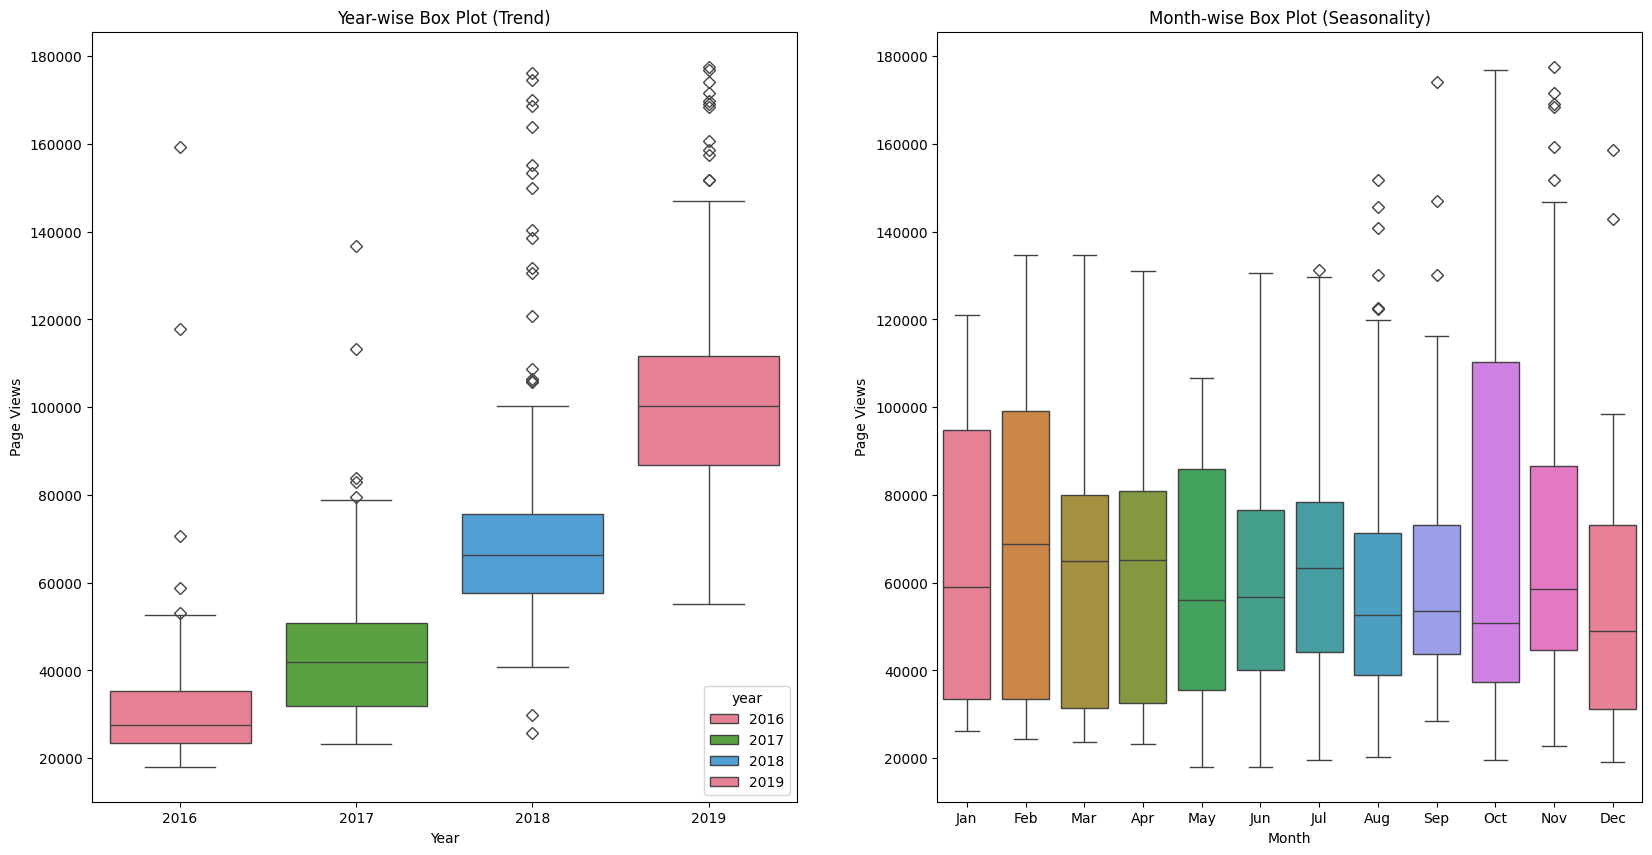

In [28]:
fig,axes = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(x=df["year"], y=df["value"], ax=axes[0], hue=df["year"], flierprops={"marker":"D"}, palette="husl")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

sns.boxplot(x=df["month_name_abb"], y=df["value"],ax=axes[1],hue=df["month"],flierprops={"marker":"D"},palette="husl", legend=None, order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

